(cattle_cycles)=
```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

```{index} single: python
```

# Cattle Cycles

```{contents} Contents
:depth: 2
```

This is another member of a suite of lectures that use the quantecon DLE class to instantiate models within the
{cite}`HS2013` class of models described in detail in {doc}`Recursive Models of Dynamic Linear Economies <hs_recursive_models>`.

In addition to what's in Anaconda, this lecture uses the quantecon library.

In [1]:
!pip install --upgrade quantecon

This lecture uses the DLE class to construct instances of  the "Cattle Cycles" model
of Rosen, Murphy and Scheinkman (1994) {cite}`rosen1994cattle`.

That paper constructs a rational expectations equilibrium model to
understand sources of recurrent cycles in US cattle stocks and prices.

We make the following imports:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import LQ
from collections import namedtuple
from quantecon import DLE
from math import sqrt
%matplotlib inline

## The Model

The model features a static linear demand curve and a "time-to-grow"
structure for cattle.

Let $p_t$ be the price of slaughtered beef, $m_t$ the cost
of preparing an animal for slaughter, $h_t$ the holding cost for a
mature animal, $\gamma_1 h_t$ the holding cost for a yearling, and
$\gamma_0 h_t$ the holding cost for a calf.

The cost processes $\{h_t, m_t \}_{t=0}^\infty$ are exogenous,
while the price process $\{p_t \}_{t=0}^\infty$ is determined
within a rational expectations equilibrium.

Let $x_t$ be the breeding stock, and $y_t$ be the total
stock of cattle.

The law of motion for the breeding stock is

$$
x_t = (1-\delta)x_{t-1} + gx_{t-3} - c_t
$$

where $g < 1$ is the number of calves that each member of the
breeding stock has each year, and $c_t$ is the number of cattle
slaughtered.

The total headcount of cattle is

$$
y_t = x_t + gx_{t-1} + gx_{t-2}
$$

This equation states that the total number of cattle equals the sum of
adults, calves and yearlings, respectively.

A representative farmer chooses $\{c_t, x_t\}$ to maximize:

$$
\mathbb{E}_0 \sum_{t=0}^\infty \beta^t \{p_tc_t - h_tx_t - \gamma_0 h_t(gx_{t-1}) - \gamma_1 h_t(gx_{t-2}) - m_tc_t - \frac{\psi_1}{2}x_t^2 - \frac{\psi_2}{2}x_{t-1}^2 - \frac{\psi_3}{2}x_{t-3}^2 - \frac{\psi_4}{2}c_t^2 \}
$$

subject to the law of motion for $x_t$, taking as given the
stochastic laws of motion for the exogenous processes, the equilibrium
price process, and the initial state [$x_{-1},x_{-2},x_{-3}$].

**Remark** The $\psi_j$ parameters are very small quadratic costs
that are included for technical reasons to make well posed and well
behaved the linear quadratic dynamic programming problem solved by the
fictitious planner who in effect chooses equilibrium quantities and shadow
prices.

Demand for beef is government by $c_t = a_0 - a_1p_t + \tilde d_t$
where $\tilde d_t$ is a stochastic process with mean zero,
representing a demand shifter.

## Mapping into HS2013 Framework

### Preferences

We set
$\Lambda = 0, \Delta_h = 0, \Theta_h = 0, \Pi = \alpha_1^{-\frac{1}{2}}$
and $b_t = \Pi \tilde d_t + \Pi \alpha_0$.

With these settings, the FOC for the household's problem becomes the
demand curve of the "Cattle Cycles" model.

### Technology

To capture the law of motion for cattle, we set

$$
\Delta_k =
\left[ {\begin{array}{ccc}
   (1-\delta) & 0 & g \\ 1 & 0 & 0 \\ 0 & 1 & 0
   \end{array} }
   \right] , \
   \Theta_k =
\left[ {\begin{array}{c}
   1 \\ 0 \\ 0
   \end{array} }
   \right]
$$

(where $i_t = - c_t$).

To capture the production of cattle, we set

$$
\Phi_c =
\left[ {\begin{array}{c}
   1 \\ f_1 \\ 0 \\ 0 \\ -f_7
   \end{array} }
   \right] , \
   \Phi_g =
\left[ {\begin{array}{cccc}
   0 & 0 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1
   \end{array} }
   \right] , \
   \Phi_i =
\left[ {\begin{array}{c}
   1 \\ 0 \\ 0 \\ 0 \\ 0
   \end{array} }
   \right] , \
   \Gamma =
\left[ {\begin{array}{ccc}
   0 & 0 & 0 \\ f_1(1-\delta) & 0 & g f_1 \\ f_3 & 0 & 0 \\ 0 & f_5 & 0 \\ 0 & 0 & 0
   \end{array} }
   \right]
$$

### Information

We set

$$
A_{22} =
\left[ {\begin{array}{cccc}
   1 & 0 & 0 & 0\\ 0 & \rho_1 & 0 & 0 \\ 0 & 0 & \rho_2 & 0 \\ 0 & 0 & 0 & \rho_3
   \end{array} }
   \right] \
,   C_2 =
\left[ {\begin{array}{ccc}
   0 & 0 & 0\\ 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 15
   \end{array} }
   \right] \
,   U_b =
\left[ {\begin{array}{cccc}
   \Pi \alpha_0 & 0 & 0 & \Pi
   \end{array} }
   \right] \
,   U_d =
\left[ {\begin{array}{c}
   0 \\ f_2 U_h \\ f_4 U_h \\ f_6 U_h \\ f_8 U_h
   \end{array} }
   \right]
$$

To map this into our class, we set $f_1^2 = \frac{\Psi_1}{2}$,
$f_2^2 = \frac{\Psi_2}{2}$, $f_3^2 = \frac{\Psi_3}{2}$,
$2f_1f_2 = 1$, $2f_3f_4 = \gamma_0g$,
$2f_5f_6 = \gamma_1g$.

In [3]:
# We define namedtuples in this way as it allows us to check, for example,
# what matrices are associated with a particular technology.

Information = namedtuple('Information', ['a22', 'c2', 'ub', 'ud'])
Technology = namedtuple('Technology', ['ϕ_c', 'ϕ_g', 'ϕ_i', 'γ', 'δ_k', 'θ_k'])
Preferences = namedtuple('Preferences', ['β', 'l_λ', 'π_h', 'δ_h', 'θ_h'])

We set parameters to those used by {cite}`rosen1994cattle`

In [4]:
β = np.array([[0.909]])
lλ = np.array([[0]])

a1 = 0.5
πh = np.array([[1 / (sqrt(a1))]])
δh = np.array([[0]])
θh = np.array([[0]])

δ = 0.1
g = 0.85
f1 = 0.001
f3 = 0.001
f5 = 0.001
f7 = 0.001

ϕc = np.array([[1], [f1], [0], [0], [-f7]])

ϕg = np.array([[0, 0, 0, 0],
               [1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1,0],
               [0, 0, 0, 1]])

ϕi = np.array([[1], [0], [0], [0], [0]])

γ = np.array([[           0,  0,      0],
              [f1 * (1 - δ),  0, g * f1],
              [          f3,  0,      0],
              [           0, f5,      0],
              [           0,  0,      0]])

δk = np.array([[1 - δ, 0, g],
               [    1, 0, 0],
               [    0, 1, 0]])

θk = np.array([[1], [0], [0]])

ρ1 = 0
ρ2 = 0
ρ3 = 0.6
a0 = 500
γ0 = 0.4
γ1 = 0.7
f2 = 1 / (2 * f1)
f4 = γ0 * g / (2 * f3)
f6 = γ1 * g / (2 * f5)
f8 = 1 / (2 * f7)

a22 = np.array([[1, 0, 0, 0],
                [0, ρ1, 0, 0],
                [0, 0, ρ2, 0],
                [0, 0, 0, ρ3]])

c2 = np.array([[0, 0,  0],
               [1, 0,  0],
               [0, 1,  0],
               [0, 0, 15]])

πh_scalar = πh.item()
ub = np.array([[πh_scalar * a0, 0, 0, πh_scalar]])
uh = np.array([[50, 1, 0, 0]])
um = np.array([[100, 0, 1, 0]])
ud = np.vstack(([0, 0, 0, 0],
                f2 * uh, f4 * uh, f6 * uh, f8 * um))

Notice that we have set $\rho_1 = \rho_2 = 0$, so $h_t$ and
$m_t$ consist of a constant and a white noise component.

We set up the economy using tuples for information, technology and
preference matrices below.

We also construct two extra information matrices, corresponding to cases
when $\rho_3 = 1$ and $\rho_3 = 0$ (as opposed to the
baseline case of $\rho_3 = 0.6$).

In [5]:
info1 = Information(a22, c2, ub, ud)
tech1 = Technology(ϕc, ϕg, ϕi, γ, δk, θk)
pref1 = Preferences(β, lλ, πh, δh, θh)

ρ3_2 = 1
a22_2 = np.array([[1,  0,  0,    0],
                  [0, ρ1,  0,    0],
                  [0,  0, ρ2,    0],
                  [0,  0,  0, ρ3_2]])

info2 = Information(a22_2, c2, ub, ud)

ρ3_3 = 0
a22_3 = np.array([[1,  0,  0,    0],
                  [0, ρ1,  0,    0],
                  [0,  0, ρ2,    0],
                  [0,  0,  0, ρ3_3]])

info3 = Information(a22_3, c2, ub, ud)

# Example of how we can look at the matrices associated with a given namedtuple
info1.a22

array([[1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.6]])

In [6]:
# Use tuples to define DLE class
econ1 = DLE(info1, tech1, pref1)
econ2 = DLE(info2, tech1, pref1)
econ3 = DLE(info3, tech1, pref1)

# Calculate steady-state in baseline case and use to set the initial condition
econ1.compute_steadystate(nnc=4)
x0 = econ1.zz

In [7]:
econ1.compute_sequence(x0, ts_length=100)

{cite}`rosen1994cattle` use the model to understand the
sources of recurrent cycles in total cattle stocks.

Plotting $y_t$ for a simulation of their model shows its ability
to generate cycles in quantities

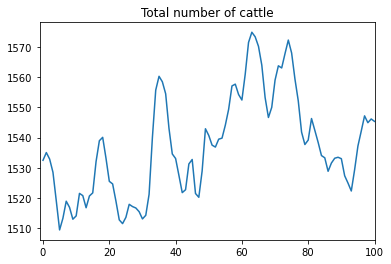

In [8]:
# Calculation of y_t
totalstock = econ1.k[0] + g * econ1.k[1] + g * econ1.k[2]
fig, ax = plt.subplots()
ax.plot(totalstock)
ax.set_xlim((-1, 100))
ax.set_title('Total number of cattle')
plt.show()

In their Figure 3, {cite}`rosen1994cattle` plot the impulse response functions
of consumption and the breeding stock of cattle to the demand shock,
$\tilde d_t$, under the three different values of $\rho_3$.

We replicate their Figure 3 below

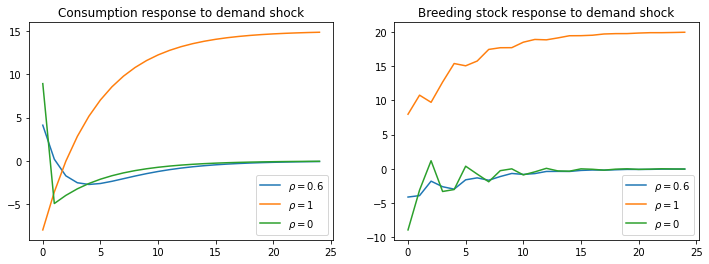

In [9]:
shock_demand = np.array([[0], [0], [1]])

econ1.irf(ts_length=25, shock=shock_demand)
econ2.irf(ts_length=25, shock=shock_demand)
econ3.irf(ts_length=25, shock=shock_demand)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(econ1.c_irf, label=r'$\rho=0.6$')
ax1.plot(econ2.c_irf, label=r'$\rho=1$')
ax1.plot(econ3.c_irf, label=r'$\rho=0$')
ax1.set_title('Consumption response to demand shock')
ax1.legend()

ax2.plot(econ1.k_irf[:, 0], label=r'$\rho=0.6$')
ax2.plot(econ2.k_irf[:, 0], label=r'$\rho=1$')
ax2.plot(econ3.k_irf[:, 0], label=r'$\rho=0$')
ax2.set_title('Breeding stock response to demand shock')
ax2.legend()
plt.show()

The above figures show how consumption patterns differ markedly,
depending on the persistence of the demand shock:

- If it is purely transitory ($\rho_3 = 0$) then consumption
  rises immediately but is later reduced to build stocks up again.
- If it is permanent ($\rho_3 = 1$), then consumption falls
  immediately, in order to build up stocks to satisfy the permanent
  rise in future demand.

In Figure 4 of their paper, {cite}`rosen1994cattle` plot the response to a demand shock
of the breeding stock *and* the total stock, for $\rho_3 = 0$ and
$\rho_3 = 0.6$.

We replicate their Figure 4 below

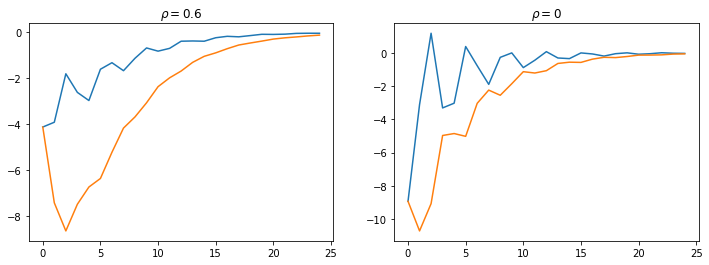

In [10]:
total1_irf = econ1.k_irf[:, 0] + g * econ1.k_irf[:, 1] + g * econ1.k_irf[:, 2]
total3_irf = econ3.k_irf[:, 0] + g * econ3.k_irf[:, 1] + g * econ3.k_irf[:, 2]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(econ1.k_irf[:, 0], label='Breeding Stock')
ax1.plot(total1_irf, label='Total Stock')
ax1.set_title(r'$\rho=0.6$')

ax2.plot(econ3.k_irf[:, 0], label='Breeding Stock')
ax2.plot(total3_irf, label='Total Stock')
ax2.set_title(r'$\rho=0$')
plt.show()

The fact that $y_t$ is a weighted moving average of $x_t$
creates a humped shape response of the total stock in response to demand
shocks, contributing to the cyclicality seen in the first graph of this
lecture.